In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/M.Tech.\ IIITP/Semester\ 1/Minor\ Project

/content/drive/MyDrive/M.Tech. IIITP/Semester 1/Minor Project


In [3]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
import ipywidgets as wg
import os
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
recipe = pd.read_excel('Minor Project.xlsx')
ingr2recipe = pd.read_excel('Minor Project.xlsx',sheet_name=1)
ingredients = pd.read_excel('Minor Project.xlsx',sheet_name=2)

## Image Training

In [25]:
path = os.getcwd()
path=Path(path)
path = path/'Dataset'

In [6]:
np.random.seed(42)
data  = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Almond',
  'Aniseed',
  'Apple',
  'Arhar Dal',
  'Asafoetida',
  'BOTTLES',
  'Baby Corn',
  'Baking Powder',
  'Banana Leaf',
  'Basil Leaf',
  'Bay Leaf',
  'Beaten Rice',
  'Bitter Gourd',
  'Black Cardamom',
  'Black Pepper Powder',
  'Bottle Gourd',
  'Bread',
  'Brinjal',
  'Broccoli',
  'Bun',
  'Butter',
  'Cabbage',
  'Capsicum',
  'Cardamom',
  'Carrot',
  'Cashewnut',
  'Cauliflower',
  'Chana Dal',
  'Chana Masala Powder',
  'Chat Masala Powder',
  'Cheese',
  'Cherry',
  'Chick Pea',
  'Chicken',
  'Chocolate',
  'Cinnamon',
  'Clove',
  'Cocoa Powder',
  'Coconut',
  'Coriander',
  'Coriander Powder',
  'Corn',
  'Cornflake',
  'Cream',
  'Cucumber',
  'Cumin Seeds Powder',
  'Curd',
  'Curry Leaf',
  'Date',
  'Dried Whole Milk',
  'Drum Stick',
  'Dry Red Chilli',
  'Egg',
  'Fenugreek Seed',
  'Fish',
  'Flour',
  'Flour_Besan',
  'Flour_Maida',
  'French Bean',
  'Fruit Salt',
  'Garam Masala Powder',
  'Garlic',
  'Ghee',
  'Ginger',
  'Green Chilli',
  'Honey',


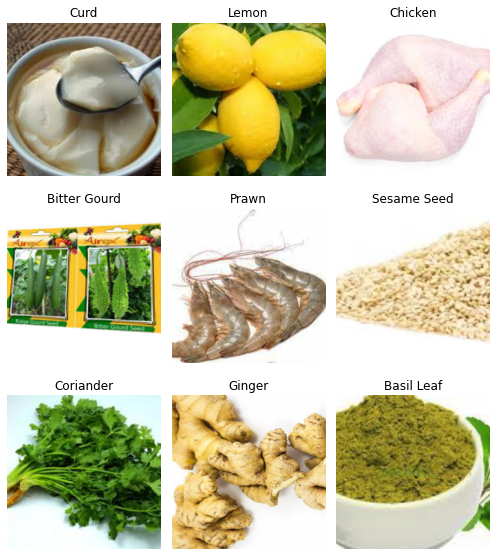

In [38]:
data.show_batch(rows=3,figsize=(7,8))

In [9]:
learn = cnn_learner(data,models.resnet101,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.259090,1.242244,0.330343,03:32
1,1.396396,0.961469,0.260530,03:28
2,0.965584,0.798899,0.230889,03:29
3,0.670878,0.752038,0.211778,03:29


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


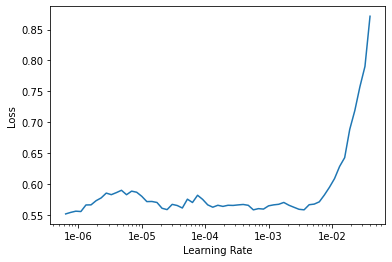

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2,slice(1e-03), pct_start=0.9)

epoch,train_loss,valid_loss,error_rate,time
0,0.605300,0.747086,0.214119,03:27
1,0.683492,0.772757,0.215289,03:28


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


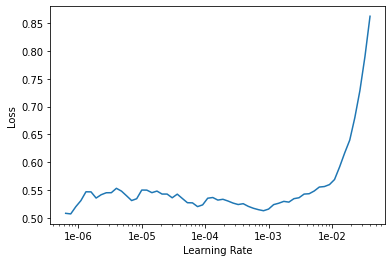

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2,slice(1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.527901,0.738214,0.203978,03:27
1,0.522441,0.733159,0.202028,03:27


In [ ]:
learn.export('REcipemodel.pkl')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

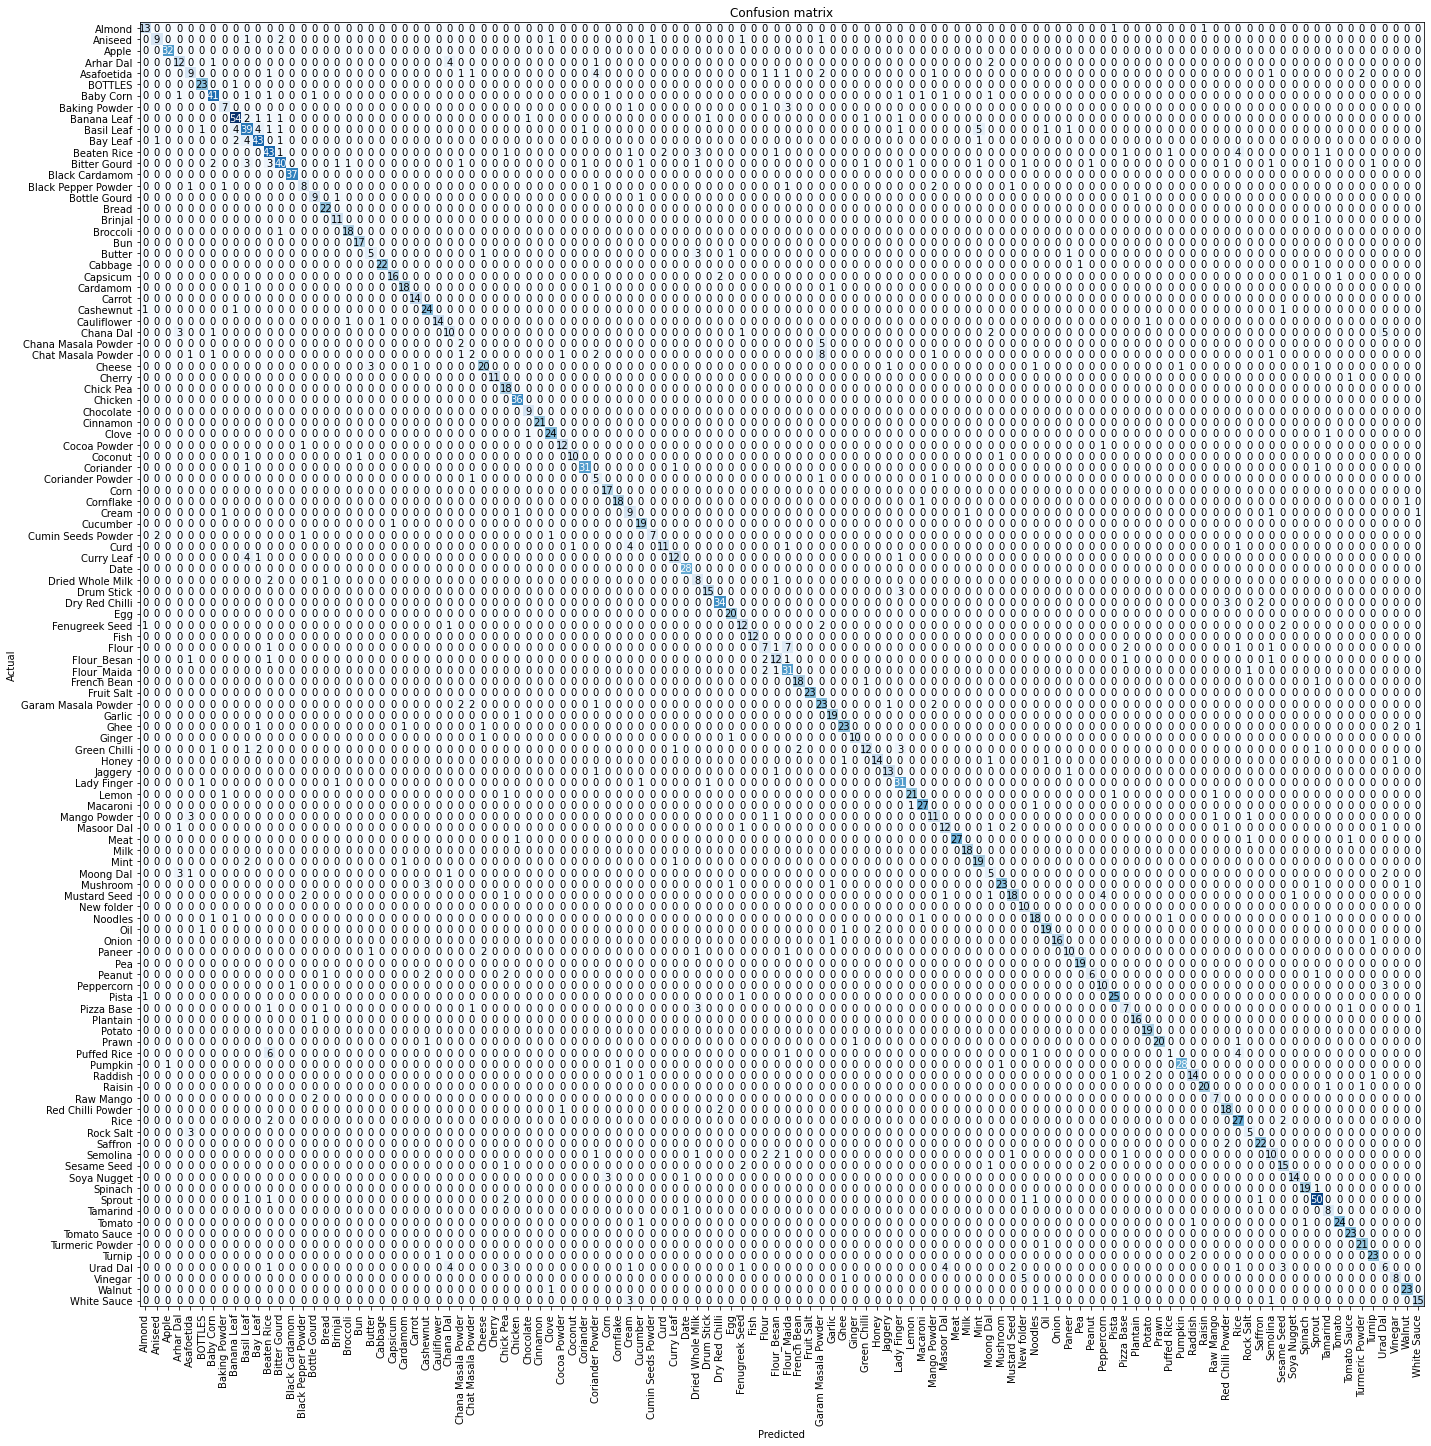

In [ ]:
interp.plot_confusion_matrix(figsize=(20,20))
#plt.figure(figsize=(100,100))

In [ ]:
path=path/'..'
learn.save(path/'stage-1')

In [ ]:
path=path/'..'
learn.load(path/'stage-1')

In [28]:
learn1 = cnn_learner(data,models.resnet50,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [30]:
learn1.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.420711,1.367081,0.357254,20:32
1,1.455358,0.987628,0.274961,03:14
2,1.006905,0.839093,0.245320,03:23
3,0.733661,0.794161,0.230499,03:27


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


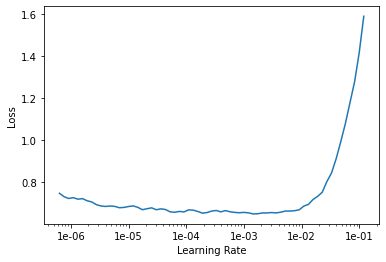

In [31]:
learn1.lr_find()
learn1.recorder.plot()

In [33]:
learn1.fit_one_cycle(4,slice(1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.664959,0.784702,0.230109,03:29


epoch,train_loss,valid_loss,error_rate,time
0,0.664959,0.784702,0.230109,03:29
1,0.641585,0.768596,0.221529,03:31
2,0.601321,0.764558,0.221919,03:31
3,0.601822,0.767634,0.217629,03:30


In [34]:
learn1.fit_one_cycle(4,slice(1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.602095,0.763153,0.218019,03:30
1,0.588817,0.755288,0.217629,03:27
2,0.574009,0.750805,0.218799,03:30
3,0.573111,0.749652,0.216849,03:31


In [35]:
learn1.save(path/'stage-2')

## Recipe Recommendation

In [11]:
dic = ingredients.to_dict()
ingrs = dict([(value, key) for key, value in dic['Ingredients'].items()])

In [12]:
#make 2nd data frame number
value_dict = {}
recipe_list = ingr2recipe['Ing2Recipe'].tolist()
for item in recipe_list:
  currentline = item.split(";")
  ingre = currentline[1:]
  title = currentline[0]
  value_dict[title] = 0
  for word in ingre:
    value_dict[title] = value_dict[title] + pow(2,ingrs[word])
values_dict = dict([(value, key) for key, value in value_dict.items()])
#values_dict

In [13]:
def recipe_display(dishname):
  food_recipe=recipe.loc[recipe['Recipe name']==dishname]
  print('\033[1m'+'Recipe name: '+'\033[0m'+str(dishname))
  print(food_recipe['Basic Descriptions'].item())
  print('\033[1m'+'Course: '+'\033[0m'+str(food_recipe['Course'].item()))
  print('\033[1m'+'Serves: '+'\033[0m'+str(food_recipe['Serves'].item()))
  print('\033[1m'+'Calories per Serving: '+'\033[0m'+str(food_recipe['Calories per serving'].item()))
  print('\033[1m'+'Cooking time: '+'\033[0m'+str(food_recipe['Cooking time (mins)'].item()))
  ings_list = str(food_recipe['Ingredients'].item()).split(';')
  print('\033[1m'+'Ingredients: '+'\033[0m'+str(ings_list[0]))
  for i in range(len(ings_list)-1):
    print('\033[1m'+'             '+'\033[0m'+str(ings_list[i+1]))
  method_list = str(food_recipe['Method'].item()).split(';')
  print('\033[1m'+'Method: '+'\033[0m'+'Step '+str(method_list[0]))
  for i in range(len(method_list)-1):
    print('\033[1m'+'        '+'\033[0m'+'Step '+str(method_list[i+1]))
  print('\033[1m'+'Chef\'s Special Tip: '+'\033[0m'+str(food_recipe['Chef\'s Special Tip'].item()))
#recipe_display('Spicy Potato Salad')

In [14]:
def ing2recipe(ingr_list,check,rbb):
  if check ==True:
    if rbb == 3:
      ingr_list = str(ingr_list).split(',')
    ingr = 0
    for item in ingr_list:
      ingr = ingr + pow(2,ingrs[item])
    if ingr in values_dict:
      dishname = values_dict[ingr]
    else:
      print( "No such Recipe present")
    recipe_display(dishname)
#ingr_list=(['Coconut','Rice','Cream','Jaggery'],True,1) 
#ing2recipe(ingr_list)

## API

In [15]:
list1 = wg.SelectMultiple(options=['Almond','Aniseed','Apple','Arhar Dal','Asafoetida','Baby Corn','Baking Powder','Banana Leaf','Basil Leaf','Bay Leaf','Beaten Rice','Bitter Gourd','Black Cardamom','Black Pepper Powder','Bottle Gourd','Bread','Brinjal','Broccoli','Bun','Butter','Cabbage','Capsicum','Cardamom','Carrot','Cashewnut','Cauliflower','Chana Dal','Chana Masala Powder','Chat Masala Powder','Cheese','Cherry','Chick Pea','Chicken','Chocolate','Cinnamon','Clove','Cocoa Powder','Coconut','Coriander','Coriander Powder','Corn','Cornflake','Cream','Cucumber','Cumin Seeds Powder','Curd','Curry Leaf','Date','Dried Whole Milk','Drum Stick','Dry Red Chilli','Egg','Fenugreek Seed','Fish','Flour','Flour_Besan','Flour_Maida','French Bean','Fruit Salt','Garam Masala Powder','Garlic','Ghee','Ginger','Green Chilli','Honey','Jaggery','Lady Finger','Lemon','Macaroni','Mango Powder','Masoor Dal','Meat','Milk','Mint','Moong Dal','Mushroom','Mustard Seed','New folder','Noodles','Oil','Onion','Paneer','Pea','Peanut','Peppercorn','Pista','Pizza Base','Plantain','Potato','Prawn','Puffed Rice','Pumpkin','Raddish','Raisin','Raw Mango','Red Chilli Powder','Rice','Rock Salt','Saffron','Semolina','Sesame Seed','Soya Nugget','Spinach','Sprout','Tamarind','Tomato','Tomato Sauce','Turmeric Powder','Turnip','Urad Dal','Vinegar','Walnut','White Sauce'],description='Ingredients',disabled=False)

In [16]:
def img_input():
  path1=os.getcwd()
  path1 = Path(path1)
  path1=path1/'test_img'
  pth = random.choice(path1.ls())
  path2=path1/pth
  figure,axs =plt.subplots(1,len(path2.ls()),figsize=(15,15))
  i=0
  ingr_list = []
  for item in path2.ls():
    img = open_image(item)
    pred_class,pred_idx,outputs =learn.predict(img)
    ing_name = pred_class.obj
    img.show(ax=axs[i],title=ing_name,figsize=(15,15))
    i=i+1
    ingr_list.append(ing_name)
  dishname = ing2recipe(ingr_list=ingr_list,check=True,rbb=1)
  figure.suptitle(dishname,y=0.4)

In [17]:
list2 = wg.Text(placeholder='Type Ingredients',description='Ingredients',disabled=False)
check1 = wg.ToggleButton(value=False,description='Click me after add all ingredients',disabled=False)
check2 = wg.ToggleButton(value=False,description='Click me after add all ingredients',disabled=False)

In [18]:
def input_method(rb):
  if rb == 1:
    img_input()
  if rb == 3:
    wg.interact(ing2recipe,check = check1,ingr_list = list2,rbb=wg.fixed(3))
  if rb == 2:
    wg.interact(ing2recipe,check = check2, ingr_list=list1,rbb=wg.fixed(2))

In [19]:
k_radio = wg.RadioButtons(
    options=[('Image Input',1),('Select Ingredient',2),('Write Text Input',3)],
    value=2,
    description = 'Type of Input'
)
wg.interact(input_method,rb=k_radio)

interactive(children=(RadioButtons(description='Type of Input', index=1, options=(('Image Input', 1), ('Select…

<function __main__.input_method>